In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from zipfile import ZipFile

Training data is on my drive as a zip file so let's first extract those zip files.

In [2]:
file_name1 = '/content/drive/MyDrive/vehicles.zip'
with ZipFile(file_name1,'r') as zip:
  zip.extractall()
  print('Done')

file_name2 = '/content/drive/MyDrive/non-vehicles.zip'
with ZipFile(file_name2,'r') as zip:
  zip.extractall()
  print('Done')

Done
Done


In [3]:
vehicle_image_filenames = glob.glob('/content/vehicles/**/*.png', recursive=True)
non_vehicle_image_filenames = glob.glob('/content/non-vehicles/**/*.png', recursive=True)

In [4]:
print('total car images',len(vehicle_image_filenames))
print('total non car images', len(non_vehicle_image_filenames))

total car images 8792
total non car images 8968


In this project we are considering only Histogram of Gradient(HOG) features.

We will use $hog$ function from $skimage.feature$ to get hog features.

Lets check hog feature of a car

Note bydefault $imshow$ uses BGR as color space. So while displaying an image with $imshow$ first change the color space to RGB using $cv2.COLOR\_BGR2RGB$

Text(0.5, 1.0, 'test image')

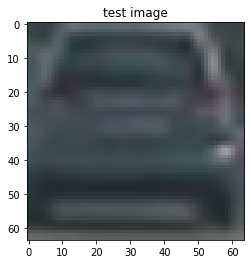

In [9]:
from skimage.feature import hog


vehicle_img = cv2.imread('/content/vehicles/GTI_Far/image0010.png')
plt.imshow(cv2.cvtColor(vehicle_img, cv2.COLOR_BGR2RGB))

pix_per_cell = 8
cell_per_block = 2
orient = 9 



features, hog_image = hog(vehicle_img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True,visualize=True, multichannel=True )
plt.title('test image')                                 

Note the size of this image is 64x64 as visible in x and y axis of image.

Text(0.5, 1.0, 'hog visualisation for test image')

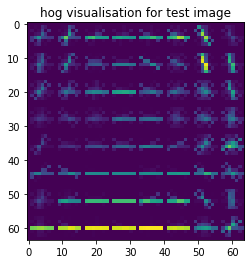

In [10]:
plt.imshow(hog_image)
plt.title('hog visualisation for test image')

Now lets understand few inputs to hog() like orientations, pixels_per_cells, cells_per_block

orientations: refers to the no. of bins in the histogram usuall set to 9.
pixels_per_cell : gives size of the cell usually 8x8
cells_per_block : no. of cells per block usually 2x2

We have describe in detail about hog feature.

Lets see the effect of pixels_per_cell on hog feature

The feature number of 2x2 cell size: 34596
The feature number of 8x8 cell size: 1764
The feature number of 16x16 cell size: 324


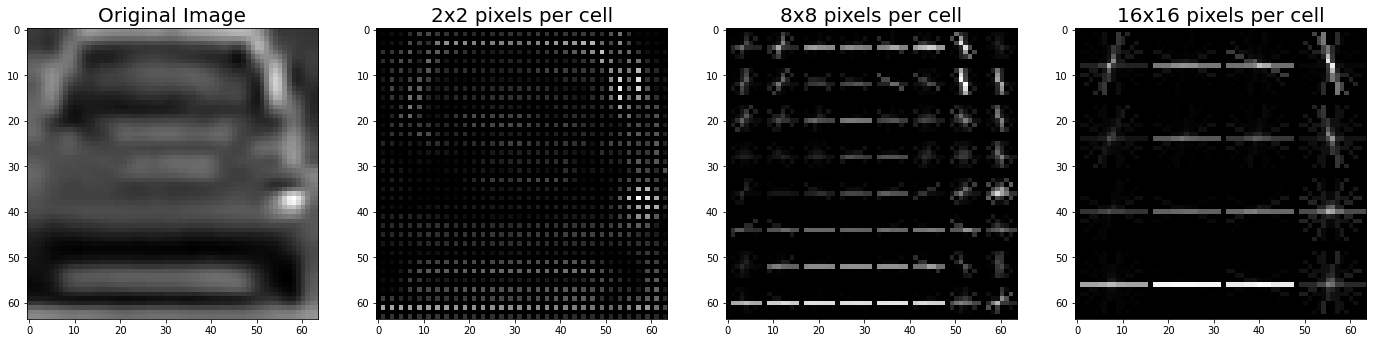

In [14]:
gray_vehicle_img = cv2.cvtColor(vehicle_img, cv2.COLOR_RGB2GRAY)

pix_per_cell_list = [
    (2, 2),
    (8, 8),
    (16, 16)
]

cells_per_block = 2
orient = 9 

plt.figure(figsize=(24,8))
plt.subplot(1,4,1)
plt.imshow(gray_vehicle_img,cmap='gray')
plt.title('Original Image', fontsize=20)
i = 2
for pix_per_cell in pix_per_cell_list:
    features, hog_img = hog(gray_vehicle_img, pixels_per_cell=pix_per_cell, cells_per_block= (cell_per_block, cell_per_block),
                            orientations = orient,visualize=True,multichannel=False)
    print('The feature number of ' + str(pix_per_cell[0]) 
        + 'x' + str(pix_per_cell[1]) + ' cell size: '
        + str(features.shape[0]))
    plt.subplot(1,4,i)
    plt.imshow(hog_img,cmap='gray')
    plt.title(
        str(pix_per_cell[0]) + 'x' 
        + str(pix_per_cell[1]) + ' pixels per cell',
        fontsize=20)
    i += 1
plt.show()
plt.close()

some observations - 
1. low pixels per cells, high is no. of features
2. higher pixels per cells, less accurately the structural info. is contained.

Lets vary cells_per_block

The feature number of 1 cell per block: 576
The feature number of 2 cell per block: 1764
The feature number of 4 cell per block: 3600


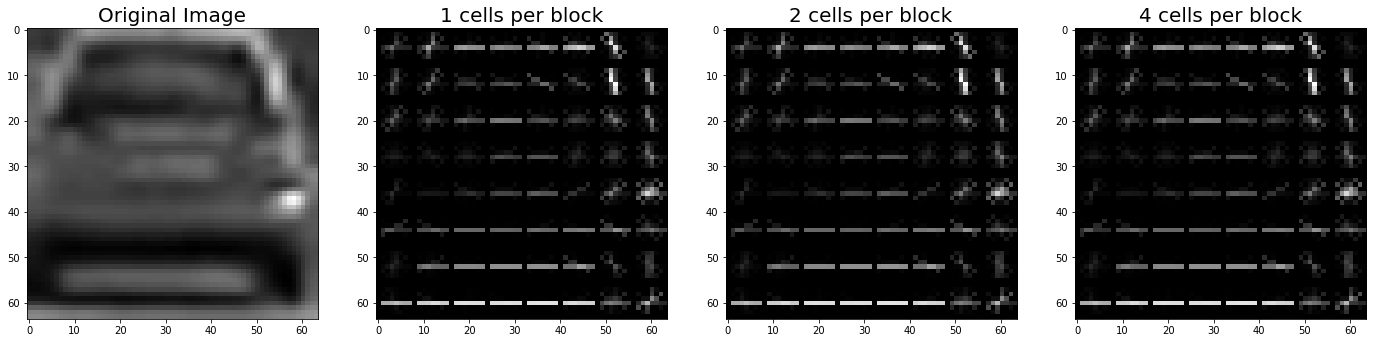

In [15]:
#gray_vehicle_img = cv2.cvtColor(vehicle_img, cv2.COLOR_RGB2GRAY)

pix_per_cell = (8,8)


cells_per_block_list = [1,2,4]
orient = 9 

plt.figure(figsize=(24,8))
plt.subplot(1,4,1)
plt.imshow(gray_vehicle_img, cmap='gray')
plt.title('Original Image', fontsize=20)
i = 2
for cell_per_block in cells_per_block_list:
    features, hog_img = hog(gray_vehicle_img, pixels_per_cell=pix_per_cell, cells_per_block= (cell_per_block, cell_per_block),
                            orientations = orient,visualize=True,multichannel=False)
    print('The feature number of ' + str(cell_per_block) 
         + ' cell per block: '
        + str(features.shape[0]))
    plt.subplot(1,4,i)
    plt.imshow(hog_img, cmap='gray')
    plt.title(
        str(cell_per_block) +  ' cells per block',
        fontsize=20)
    i += 1
plt.show()
plt.close()

lets vary oreintations

The feature number of 1 orient: 196
The feature number of 3 orient: 588
The feature number of 5 orient: 980
The feature number of 9 orient: 1764
The feature number of 12 orient: 2352


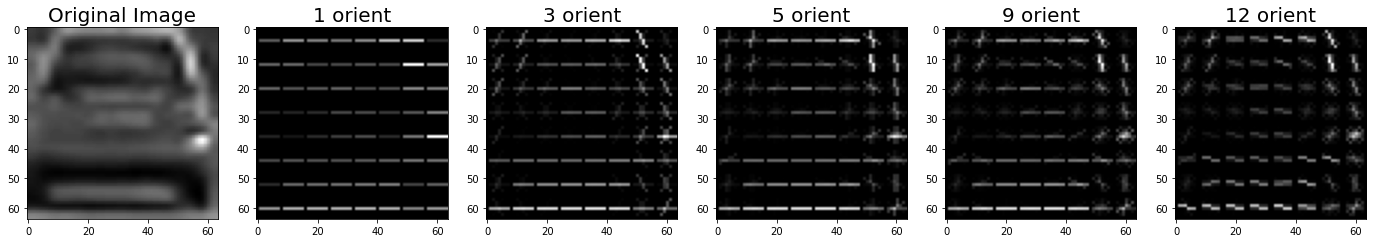

In [25]:
pix_per_cell = (8,8)


cell_per_block = 2
orient_list = [1,3,5,9,12] 

plt.figure(figsize=(24,8))
plt.subplot(1,6,1)
plt.imshow(gray_vehicle_img, cmap='gray')
plt.title('Original Image', fontsize=20)
i = 2
for orient in orient_list:
    features, hog_img = hog(gray_vehicle_img, pixels_per_cell=pix_per_cell, cells_per_block= (cell_per_block, cell_per_block),
                            orientations = orient,visualize=True,multichannel=False)
    print('The feature number of ' + str(orient) 
         + ' orient: '
        + str(features.shape[0]))
    plt.subplot(1,6,i)
    plt.imshow(hog_img, cmap='gray')
    plt.title(
        str(orient) +  ' orient',
        fontsize=20)
    i += 1
plt.show()
plt.close()

In [26]:
def get_features(img,orient,pix_per_cell,cell_per_block,vis=False,  feature_vec=True):
      
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image

    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualize=vis, feature_vector=feature_vec)
        return features


Now lets create a function which will extract hog feature for not just one image but for all the images given to it as a list of file names. It will also take the color space as imput because we need to choose appropriate color space for good accuracy.

In [27]:
def extract_features(imgs, cspace='RGB',orient=9, pix_per_cell=8,cell_per_block=2,hog_channel=2):
 
    features = []
    # imgs is list of filenames of images
    for file in imgs:
        image = mpimg.imread(file) #read one file
        # changing color space according to cspace given
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      


        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
       
        features.append(hog_features)
    # Returns hog feature as a row vector
    return features

now lets take 10% of vehicle and non-vehicle data randomly for checking which combination of features perform better.

In [28]:
import random
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

In [29]:
vehicle_images = random.sample(vehicle_image_filenames,880)
non_vehicle_images = random.sample(non_vehicle_image_filenames,880)

In [35]:
color_space_list = ['YUV','HSV','YCrCb','RGB']
cells_per_block_list = [2,1]
pix_per_cell_list = [8,16]

In [36]:
def feature_select(vehicle_images, non_vehicle_images,
                      color_space_list, 
                      cells_per_block_list, pix_per_cell_list):
  hog_channel = 'ALL'
  orient = 9
  for color_space in color_space_list:
    for cell_per_block in cells_per_block_list:
      for pix_per_cell in pix_per_cell_list:
        t1 = time.time()
        print('calculating for------>')
        print('colr_space',color_space)
        print('cell per block',cell_per_block)
        print('pix_per cell',pix_per_cell)

        vehicle_hog_features = extract_features(vehicle_image_filenames, color_space,
                                              orient,pix_per_cell,
                                              cell_per_block,hog_channel)

        non_vehicle_hog_features = extract_features(non_vehicle_image_filenames, 
                                                  color_space, 
                                                  orient, 
                                                  pix_per_cell, 
                                                  cell_per_block,
                                                  hog_channel)

        t2 = time.time()
        print(round(t2-t1, 2), 'Seconds to extract HOG features...')

        # Create a column of hog feature
        X = np.vstack((vehicle_hog_features, non_vehicle_hog_features)).astype(np.float64)                        
        # Fit a scaler
        X_scaler = StandardScaler().fit(X)
        # Apply the scaler to X
        scaled_X = X_scaler.transform(X)
        y = np.hstack((np.ones(len(vehicle_hog_features)), np.zeros(len(non_vehicle_hog_features))))

        # Split up data into randomized training and test sets
        rand_state = np.random.randint(0, 100)

        X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

        print('Using:', orient, 'orientations', pix_per_cell, 'pixels per cell and', cell_per_block, 'cells per block')
        print('Training data set size: ', len(X_train))
        print('Testing data set size: ', len(X_test))

        # Use a linear SVC 
        svc = LinearSVC()

        # Checking the training time
        t=time.time()
        svc.fit(X_train, y_train)
        t2 = time.time()

        print(round(t2-t, 2), 'Seconds to train SVC...')

        # Check the score of the SVC
        print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
        print('------------------------!!!!!!!!!!!!!!!!------------------------')


In [38]:
feature_select(vehicle_images, non_vehicle_images,
                  color_space_list, cells_per_block_list
                  ,pix_per_cell_list)

calculating for------>
colr_space YUV
cell per block 2
pix_per cell 8
100.57 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Training data set size:  14208
Testing data set size:  3552
6.85 Seconds to train SVC...
Test Accuracy of SVC =  0.9811
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space YUV
cell per block 2
pix_per cell 16
63.09 Seconds to extract HOG features...
Using: 9 orientations 16 pixels per cell and 2 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2.18 Seconds to train SVC...
Test Accuracy of SVC =  0.9783
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space YUV
cell per block 1
pix_per cell 8
112.09 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 1 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


7.38 Seconds to train SVC...
Test Accuracy of SVC =  0.9611
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space YUV
cell per block 1
pix_per cell 16
55.12 Seconds to extract HOG features...
Using: 9 orientations 16 pixels per cell and 1 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


4.56 Seconds to train SVC...
Test Accuracy of SVC =  0.9659
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space HSV
cell per block 2
pix_per cell 8
103.03 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


20.27 Seconds to train SVC...
Test Accuracy of SVC =  0.9783
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space HSV
cell per block 2
pix_per cell 16
51.04 Seconds to extract HOG features...
Using: 9 orientations 16 pixels per cell and 2 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.79 Seconds to train SVC...
Test Accuracy of SVC =  0.9797
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space HSV
cell per block 1
pix_per cell 8
118.31 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 1 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


6.59 Seconds to train SVC...
Test Accuracy of SVC =  0.9623
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space HSV
cell per block 1
pix_per cell 16
58.36 Seconds to extract HOG features...
Using: 9 orientations 16 pixels per cell and 1 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


4.12 Seconds to train SVC...
Test Accuracy of SVC =  0.9662
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space YCrCb
cell per block 2
pix_per cell 8
110.11 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Training data set size:  14208
Testing data set size:  3552
10.9 Seconds to train SVC...
Test Accuracy of SVC =  0.9851
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space YCrCb
cell per block 2
pix_per cell 16
49.25 Seconds to extract HOG features...
Using: 9 orientations 16 pixels per cell and 2 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.92 Seconds to train SVC...
Test Accuracy of SVC =  0.9772
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space YCrCb
cell per block 1
pix_per cell 8
115.64 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 1 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


6.63 Seconds to train SVC...
Test Accuracy of SVC =  0.9561
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space YCrCb
cell per block 1
pix_per cell 16
56.07 Seconds to extract HOG features...
Using: 9 orientations 16 pixels per cell and 1 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


4.63 Seconds to train SVC...
Test Accuracy of SVC =  0.9707
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space RGB
cell per block 2
pix_per cell 8
101.98 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


24.29 Seconds to train SVC...
Test Accuracy of SVC =  0.9682
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space RGB
cell per block 2
pix_per cell 16
48.01 Seconds to extract HOG features...
Using: 9 orientations 16 pixels per cell and 2 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3.28 Seconds to train SVC...
Test Accuracy of SVC =  0.9721
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space RGB
cell per block 1
pix_per cell 8
117.88 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 1 cells per block
Training data set size:  14208
Testing data set size:  3552


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


8.0 Seconds to train SVC...
Test Accuracy of SVC =  0.9364
------------------------!!!!!!!!!!!!!!!!------------------------
calculating for------>
colr_space RGB
cell per block 1
pix_per cell 16
56.38 Seconds to extract HOG features...
Using: 9 orientations 16 pixels per cell and 1 cells per block
Training data set size:  14208
Testing data set size:  3552
6.25 Seconds to train SVC...
Test Accuracy of SVC =  0.9505
------------------------!!!!!!!!!!!!!!!!------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 YUV, 9 orientations 8 pixels per cell and 2 cells per block has max accuracy of .9811